
## Insurance Claims- Fraud Detection

### Problem Statement:
##### Business case:

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy.stats import zscore
import sklearn
from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('insurance_data.csv')
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

In [3]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [4]:
df.shape

(1000, 40)

In [5]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [6]:
df=df.drop(['_c39'],axis=1)

In [7]:
df.duplicated().sum()

0

In [8]:
columns=df.columns
for c in columns:
    print(c)
    
    print(df[c].value_counts())

months_as_customer
194    8
285    7
140    7
230    7
128    7
      ..
347    1
113    1
337    1
117    1
0      1
Name: months_as_customer, Length: 391, dtype: int64
age
43    49
39    48
41    45
34    44
30    42
31    42
38    42
37    41
33    39
32    38
40    38
29    35
46    33
35    32
36    32
42    32
44    32
28    30
45    26
26    26
48    25
47    24
27    24
57    16
25    14
49    14
55    14
50    13
53    13
61    10
24    10
54    10
60     9
51     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
22     1
20     1
19     1
Name: age, dtype: int64
policy_number
116735    1
107181    1
430794    1
115399    1
328387    1
         ..
218456    1
179538    1
357713    1
247116    1
296960    1
Name: policy_number, Length: 1000, dtype: int64
policy_bind_date
28-04-1992    3
01-01-2006    3
05-08-1992    3
14-12-1991    2
22-08-1991    2
             ..
05-12-2007    1
25-03-2007    1
01-02-1990    1
23-01-1996    1
27-12-2001    1
N

- There are no null-values in the dataset , but there are mis-interpreted values in the following columns.

property_damage

police_report_available

collision_type

In [9]:
df.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  
count     1000.000000    1000.000000  1000.000000  
mean      7399.570000   37928.950000  2005.103000  
std       4824.726179   18886.252893     6.015861  
min          0.000000      70.000000  1995.000000  
25%       4445.000000   30292.500000  2000.000000  
50%       6750.000000   42100.000000  2005.000000  
75%      10885.000000   50822.500000  2010.000000  
max      23670.000000   79560.000000  2015.000000

## Handling the mis-interpreted values :-

In [10]:
df['collision_type'] = df['collision_type'].str.replace('?', 'Rear Collision', regex=True) 

In [11]:
df['property_damage'] = df['property_damage'].str.replace('?', 'NO', regex=True) 

In [12]:
df['police_report_available'] = df['police_report_available'].str.replace('?', 'NO', regex=True) 

In [13]:
df['collision_type'].value_counts()

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [14]:
df['property_damage'].value_counts()

NO     698
YES    302
Name: property_damage, dtype: int64

In [15]:
df['police_report_available'].value_counts()

NO     686
YES    314
Name: police_report_available, dtype: int64

In [16]:
df.describe() # numerical data only

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  
count     1000.000000    1000.000000  1000.000000  
mean      7399.570000   37928.950000  2005.103000  
std       4824.726179   18886.252893     6.015861  
min          0.000000      70.000000  1995.000000  
25%       4445.000000   30292.500000  2000.000000  
50%       6750.000000   42100.000000  2005.000000  
75%      10885.000000   50822.500000  2010.000000  
max      23670.000000   79560.000000  2015.000000

In [17]:
df.shape

(1000, 39)

In [18]:
df_categorical=df[['policy_bind_date','policy_state', 'policy_csl',
        'insured_sex','insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'property_damage','police_report_available','auto_make',
       'auto_model','fraud_reported']].copy()

df_categorical.head()

policy_bind_date policy_state policy_csl insured_sex  \
0       17-10-2014           OH    250/500        MALE   
1       27-06-2006           IN    250/500        MALE   
2       06-09-2000           OH    100/300      FEMALE   
3       25-05-1990           IL    250/500      FEMALE   
4       06-06-2014           IL   500/1000        MALE   

  insured_education_level insured_occupation insured_hobbies  \
0                      MD       craft-repair        sleeping   
1                      MD  machine-op-inspct         reading   
2                     PhD              sales     board-games   
3                     PhD       armed-forces     board-games   
4               Associate              sales     board-games   

  insured_relationship incident_date             incident_type  ...  \
0              husband    25-01-2015  Single Vehicle Collision  ...   
1       other-relative    21-01-2015             Vehicle Theft  ...   
2            own-child    22-02-2015   Multi-vehicle Collision  ...   
3            unmarried    10-01-2015  Single Vehicle Collision  ...   
4            unmarried    17-02-2015             Vehicle Theft  ...   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

  incident_hour_of_the_day property_damage  police_report_available  \
0                        5             YES                      YES   
1                        8              NO                       NO   
2                        7              NO                       NO   
3                        5              NO                       NO   
4                       20              NO                       NO   

   auto_make auto_model fraud_reported  
0       Saab        92x              Y  
1   Mercedes       E400              Y  
2      Dodge        RAM              N  
3  Chevrolet      Tahoe              Y  
4     Accura        RSX              N  

[5 rows x 22 columns]

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


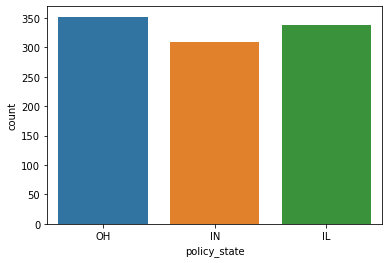

In [19]:
ax=sns.countplot(x='policy_state',data=df_categorical)
print(df_categorical['policy_state'].value_counts())

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


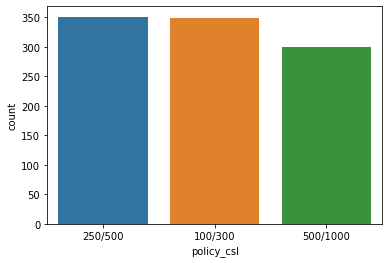

In [20]:
ax=sns.countplot(x='policy_csl',data=df_categorical)
print(df_categorical['policy_csl'].value_counts())

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


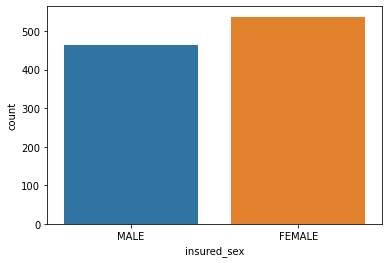

In [21]:
ax=sns.countplot(x='insured_sex',data=df_categorical)
print(df_categorical['insured_sex'].value_counts())

- No of Females with insurance is higher than males in the record.

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


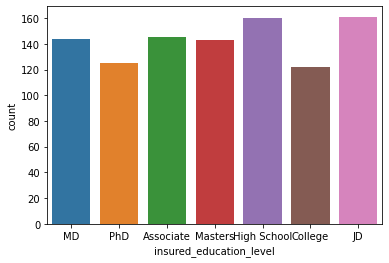

In [22]:
ax=sns.countplot(x='insured_education_level',data=df_categorical)
print(df_categorical['insured_education_level'].value_counts())

- The no of people with education background High School is the highest in the record.

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


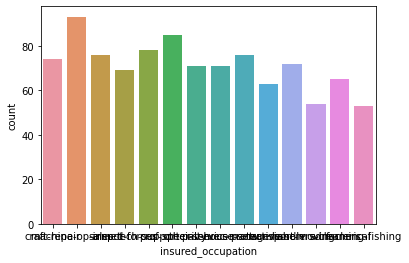

In [23]:
ax=sns.countplot(x='insured_occupation',data=df_categorical)
print(df_categorical['insured_occupation'].value_counts())

reading           64
exercise          57
paintball         57
bungie-jumping    56
camping           55
movies            55
golf              55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64


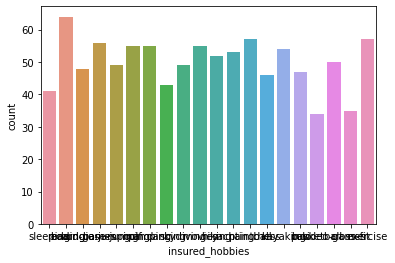

In [24]:
ax=sns.countplot(x='insured_hobbies',data=df_categorical)
print(df_categorical['insured_hobbies'].value_counts())

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


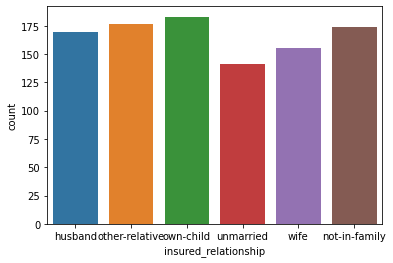

In [25]:
ax=sns.countplot(x='insured_relationship',data=df_categorical)
print(df_categorical['insured_relationship'].value_counts())

- People having child in thier family are having insurance than any other relationship in the record.

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


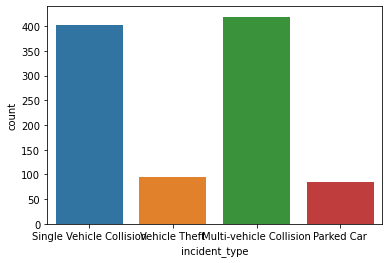

In [26]:
ax=sns.countplot(x='incident_type',data=df_categorical)
print(df_categorical['incident_type'].value_counts())

- Multi-vehicle collision and single vehicle type collisions are highest in the record.

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64


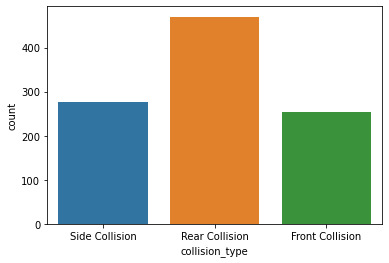

In [27]:
ax=sns.countplot(x='collision_type',data=df_categorical)
print(df_categorical['collision_type'].value_counts())

- The record has more than average insurances claims because of rear collision .

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


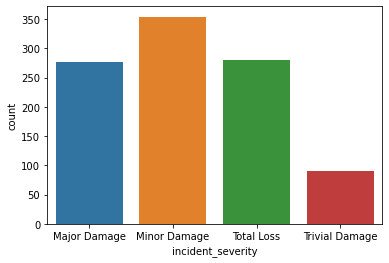

In [28]:
ax=sns.countplot(x='incident_severity',data=df_categorical)
print(df_categorical['incident_severity'].value_counts())

- Minor damage is having more insurance claims than any other incident.

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64


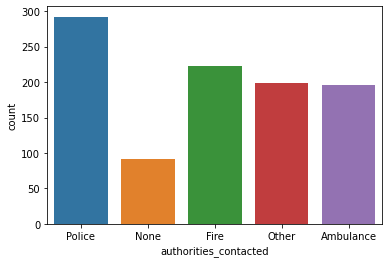

In [29]:
ax=sns.countplot(x='authorities_contacted',data=df_categorical)
print(df_categorical['authorities_contacted'].value_counts())

- Police department is the most contacted category in the record.

NY    262
SC    248
WV    217
NC    110
VA    110
PA     30
OH     23
Name: incident_state, dtype: int64


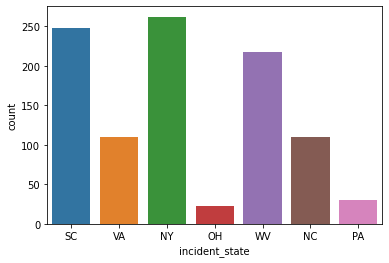

In [30]:
ax=sns.countplot(x='incident_state',data=df_categorical)
print(df_categorical['incident_state'].value_counts())

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


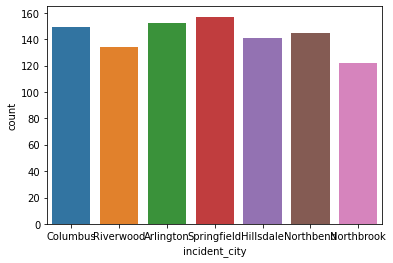

In [31]:
ax=sns.countplot(x='incident_city',data=df_categorical)
print(df_categorical['incident_city'].value_counts())

9148 4th Hwy               1
7973 4th St                1
5667 4th Drive             1
7500 Texas Ridge           1
5621 4th Ave               1
                          ..
2087 Apache Ave            1
3799 Embaracadero Drive    1
5650 Rock Ave              1
1989 Solo Lane             1
2603 Andromedia Hwy        1
Name: incident_location, Length: 1000, dtype: int64


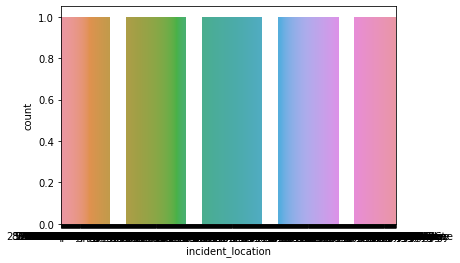

In [32]:
ax=sns.countplot(x='incident_location',data=df_categorical)
print(df_categorical['incident_location'].value_counts())

17    54
3     53
0     52
23    51
16    49
4     46
13    46
10    46
6     44
9     43
14    43
21    42
18    41
7     40
19    40
12    40
15    39
22    38
8     36
20    34
5     33
2     31
11    30
1     29
Name: incident_hour_of_the_day, dtype: int64


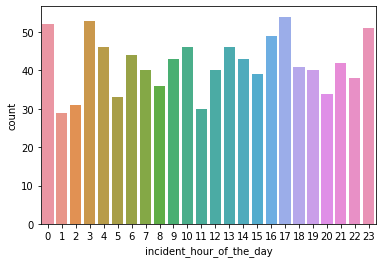

In [33]:
ax=sns.countplot(x='incident_hour_of_the_day',data=df_categorical)
print(df_categorical['incident_hour_of_the_day'].value_counts())

NO     698
YES    302
Name: property_damage, dtype: int64


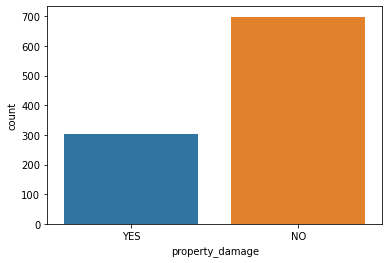

In [34]:
ax=sns.countplot(x='property_damage',data=df_categorical)
print(df_categorical['property_damage'].value_counts())

- More than average record has not faced property damage.

NO     686
YES    314
Name: police_report_available, dtype: int64


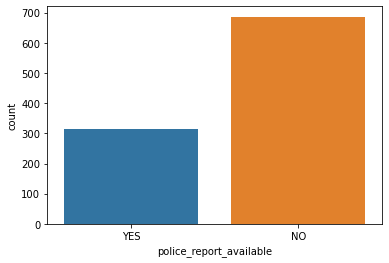

In [35]:
ax=sns.countplot(x='police_report_available',data=df_categorical)
print(df_categorical['police_report_available'].value_counts())

- more than average insurance claims do not have police report record available.

Dodge         80
Saab          80
Suburu        80
Nissan        78
Chevrolet     76
BMW           72
Ford          72
Toyota        70
Audi          69
Volkswagen    68
Accura        68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64


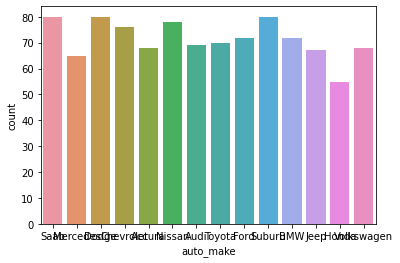

In [36]:
ax=sns.countplot(x='auto_make',data=df_categorical)
print(df_categorical['auto_make'].value_counts())

N    753
Y    247
Name: fraud_reported, dtype: int64


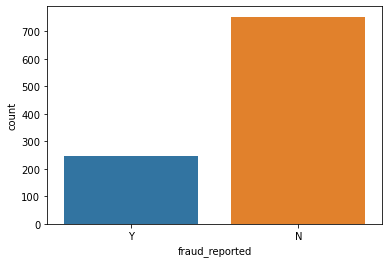

In [37]:
ax=sns.countplot(x='fraud_reported',data=df_categorical)
print(df_categorical['fraud_reported'].value_counts())

- More than avaerage of the record does not have fraud reported.

In [38]:
df_numerical=df[['months_as_customer','age','policy_number','policy_deductable','policy_annual_premium','umbrella_limit','insured_zip','capital-gains','capital-loss','incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries','witnesses','total_claim_amount','injury_claim','property_claim','vehicle_claim','auto_year'].copy()]
df_numerical.head()

months_as_customer  age  policy_number  policy_deductable  \
0                 328   48         521585               1000   
1                 228   42         342868               2000   
2                 134   29         687698               2000   
3                 256   41         227811               2000   
4                 228   44         367455               1000   

   policy_annual_premium  umbrella_limit  insured_zip  capital-gains  \
0                1406.91               0       466132          53300   
1                1197.22         5000000       468176              0   
2                1413.14         5000000       430632          35100   
3                1415.74         6000000       608117          48900   
4                1583.91         6000000       610706          66000   

   capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
0             0                         5                            1   
1             0                         8                            1   
2             0                         7                            3   
3        -62400                         5                            1   
4        -46000                        20                            1   

   bodily_injuries  witnesses  total_claim_amount  injury_claim  \
0                1          2               71610          6510   
1                0          0                5070           780   
2                2          3               34650          7700   
3                1          2               63400          6340   
4                0          1                6500          1300   

   property_claim  vehicle_claim  auto_year  
0           13020          52080       2004  
1             780           3510       2007  
2            3850          23100       2007  
3            6340          50720       2014  
4             650           4550       2009

## Multi-variate analysis

array([[<AxesSubplot:title={'center':'months_as_customer'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'policy_number'}>,
        <AxesSubplot:title={'center':'policy_deductable'}>],
       [<AxesSubplot:title={'center':'policy_annual_premium'}>,
        <AxesSubplot:title={'center':'umbrella_limit'}>,
        <AxesSubplot:title={'center':'insured_zip'}>,
        <AxesSubplot:title={'center':'capital-gains'}>],
       [<AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'incident_hour_of_the_day'}>,
        <AxesSubplot:title={'center':'number_of_vehicles_involved'}>,
        <AxesSubplot:title={'center':'bodily_injuries'}>],
       [<AxesSubplot:title={'center':'witnesses'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:title={'center':'injury_claim'}>,
        <AxesSubplot:title={'center':'property_claim'}>],
       [<AxesSubplot:title={'center':'vehicle_claim'}>,
        <Ax

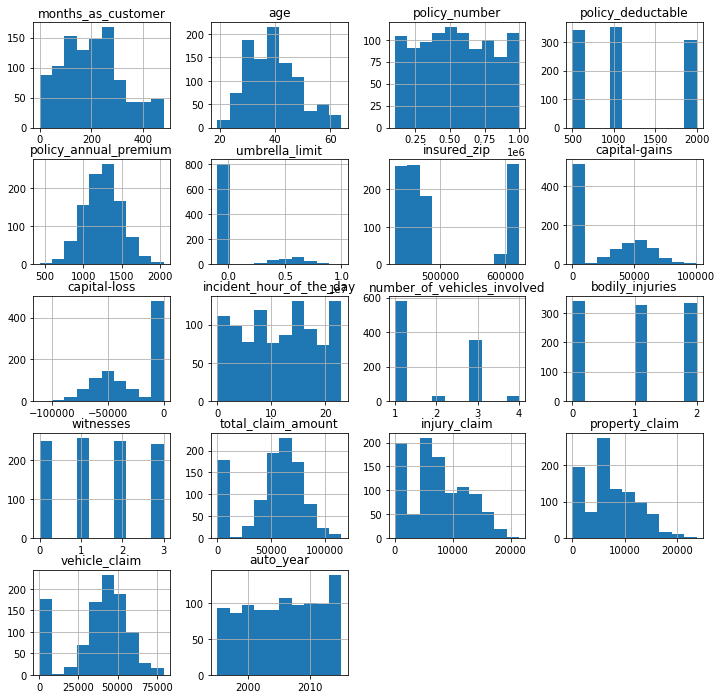

In [39]:
df.hist(figsize=(12,12),sharex=False)

months_as_customer                AxesSubplot(0.125,0.125;0.036215x0.755)
age                            AxesSubplot(0.168458,0.125;0.036215x0.755)
policy_number                  AxesSubplot(0.211916,0.125;0.036215x0.755)
policy_deductable              AxesSubplot(0.255374,0.125;0.036215x0.755)
policy_annual_premium          AxesSubplot(0.298832,0.125;0.036215x0.755)
umbrella_limit                  AxesSubplot(0.34229,0.125;0.036215x0.755)
insured_zip                    AxesSubplot(0.385748,0.125;0.036215x0.755)
capital-gains                  AxesSubplot(0.429206,0.125;0.036215x0.755)
capital-loss                   AxesSubplot(0.472664,0.125;0.036215x0.755)
incident_hour_of_the_day       AxesSubplot(0.516121,0.125;0.036215x0.755)
number_of_vehicles_involved    AxesSubplot(0.559579,0.125;0.036215x0.755)
bodily_injuries                AxesSubplot(0.603037,0.125;0.036215x0.755)
witnesses                      AxesSubplot(0.646495,0.125;0.036215x0.755)
total_claim_amount             AxesSub

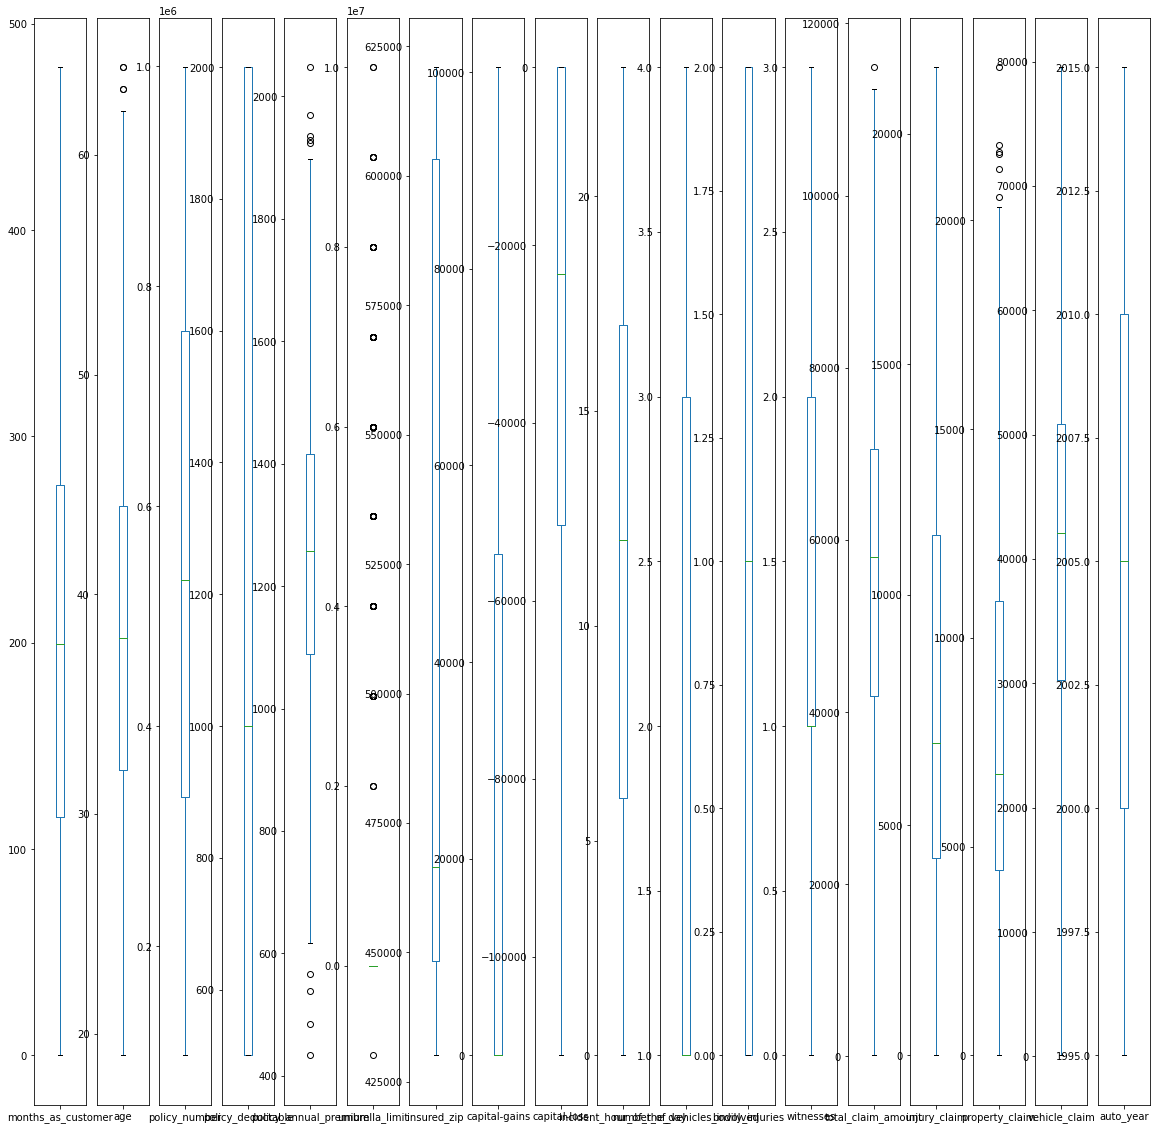

In [40]:
df.plot(kind='box',figsize=(20,20),sharex=False,subplots=True)

- High number of outliers present are not seen in the boxplot graph of the dataset.

## Bi-variate Analysis

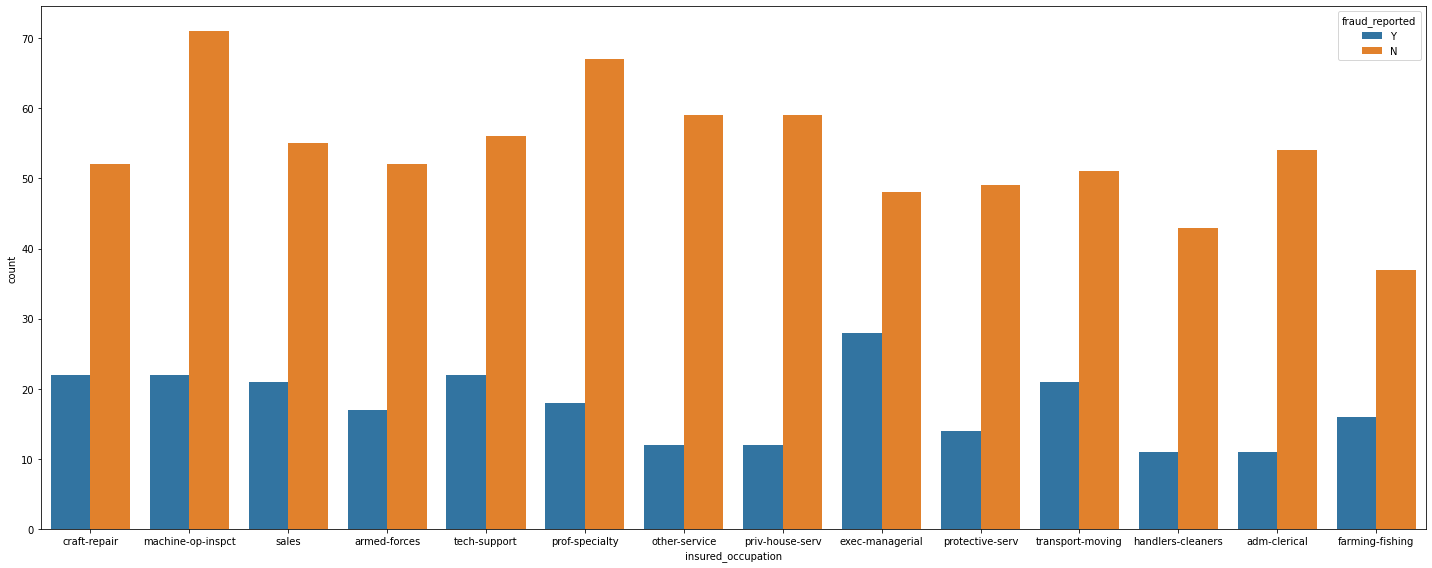

In [41]:
fig=plt.figure(figsize=(20,8))
sns.countplot('insured_occupation', hue='fraud_reported', data=df)
plt.tight_layout()
plt.show()

- The variable insured_occupation shows the difference of fraud_reort made or not.

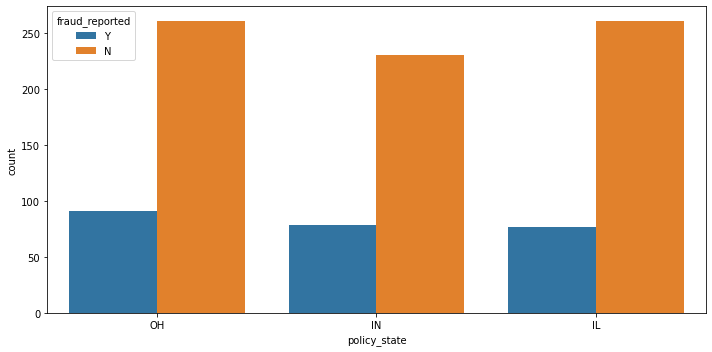

In [42]:
fig=plt.figure(figsize=(10,5))
sns.countplot('policy_state', hue='fraud_reported', data=df)
plt.tight_layout()
plt.show()

- The policy_state does not impact the fraud_report to much extent.

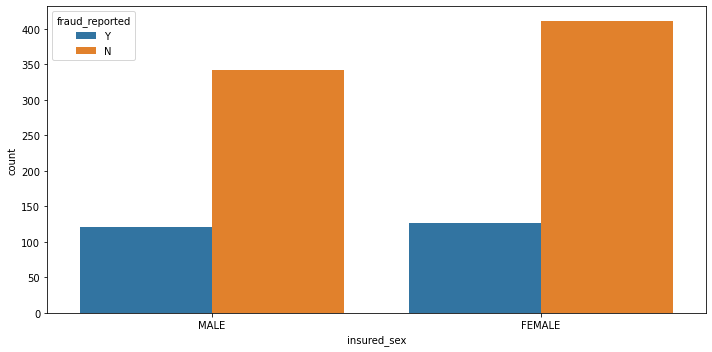

In [43]:
fig=plt.figure(figsize=(10,5))
sns.countplot('insured_sex', hue='fraud_reported', data=df)
plt.tight_layout()
plt.show()

- The no of females and males who have insurance and have fraud reported or not is almost similar.

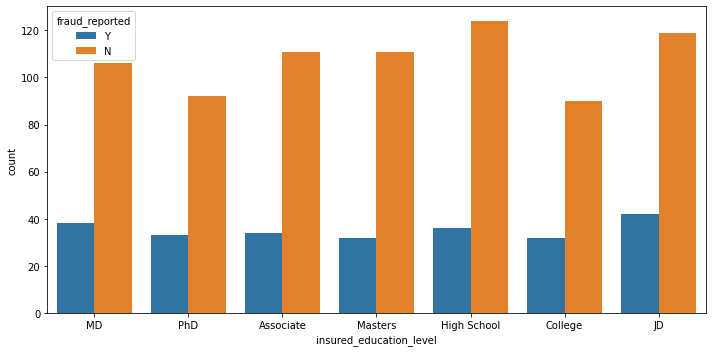

In [44]:
fig=plt.figure(figsize=(10,5))
sns.countplot('insured_education_level', hue='fraud_reported', data=df)
plt.tight_layout()
plt.show()

- Insured education level does not make big changes in the fraud reports.

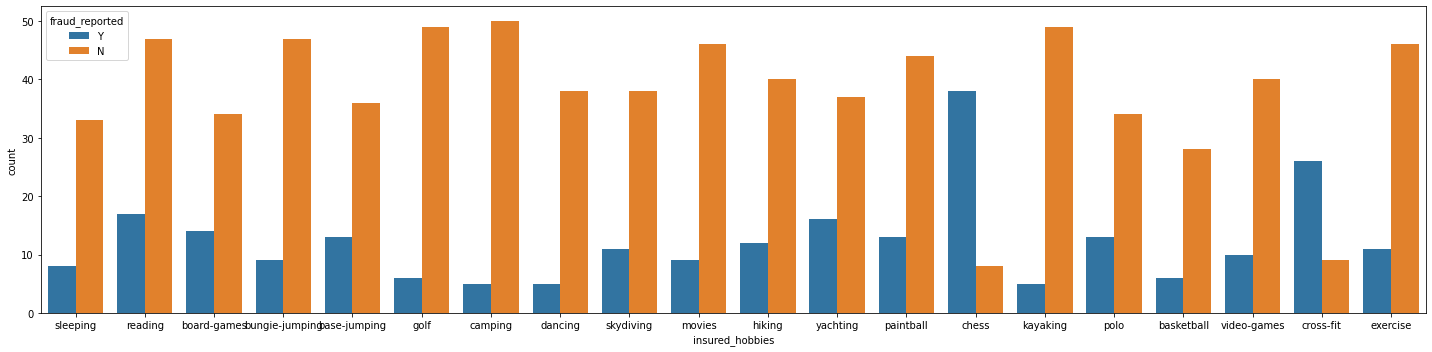

In [45]:
fig=plt.figure(figsize=(20,5))
sns.countplot('insured_hobbies', hue='fraud_reported', data=df)
plt.tight_layout()
plt.show()

- Seems strange but insured hobbies make great impact on the fraud reports like , people who are fond of Chess have the highest no of positive fraud reports.

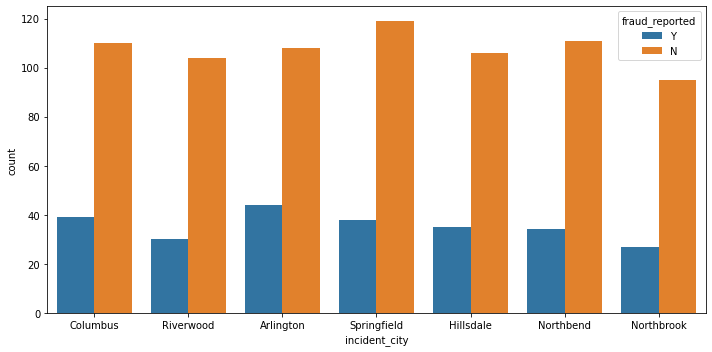

In [46]:
fig=plt.figure(figsize=(10,5))
sns.countplot('incident_city', hue='fraud_reported', data=df)
plt.tight_layout()
plt.show()

- Arlington has more fraud reports as compared to other cities.

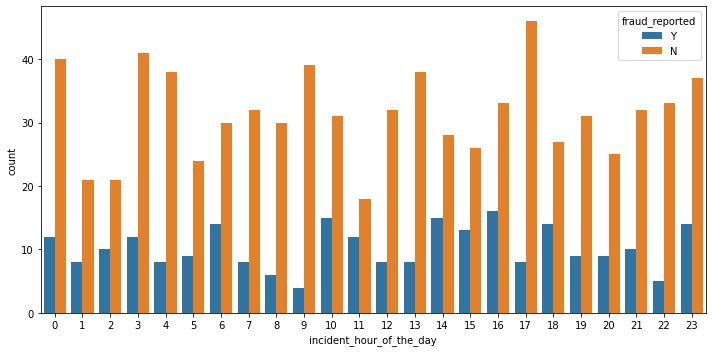

In [47]:
fig=plt.figure(figsize=(10,5))
sns.countplot('incident_hour_of_the_day', hue='fraud_reported', data=df)
plt.tight_layout()
plt.show()

- The incident hour has helped in fraud reports , the sooner it was reported the sooner it was found to be claimed.

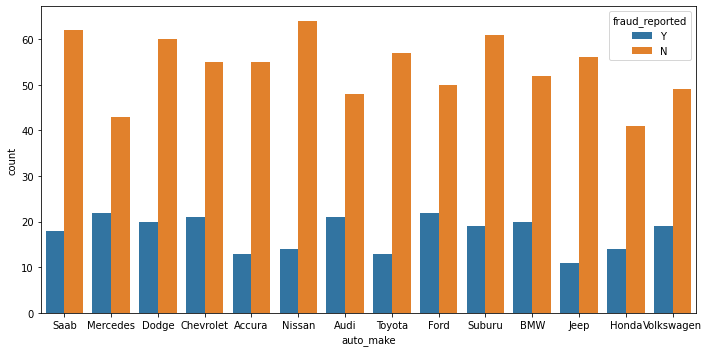

In [48]:
fig=plt.figure(figsize=(10,5))
sns.countplot('auto_make', hue='fraud_reported', data=df)
plt.tight_layout()
plt.show()

- High end automobiles like Audi ,Ford,Mercedes are having more fraud_reports than other moderate end automobiles like jeep , Accura.

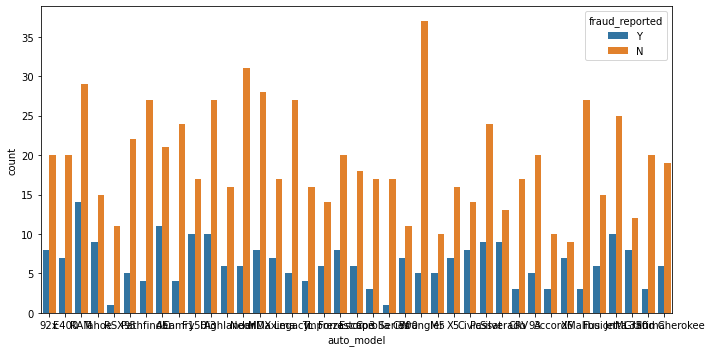

In [49]:
fig=plt.figure(figsize=(10,5))
sns.countplot('auto_model', hue='fraud_reported', data=df)
plt.tight_layout()
plt.show()

## Mulit-Variate Analysis :-

<Figure size 1440x720 with 0 Axes>

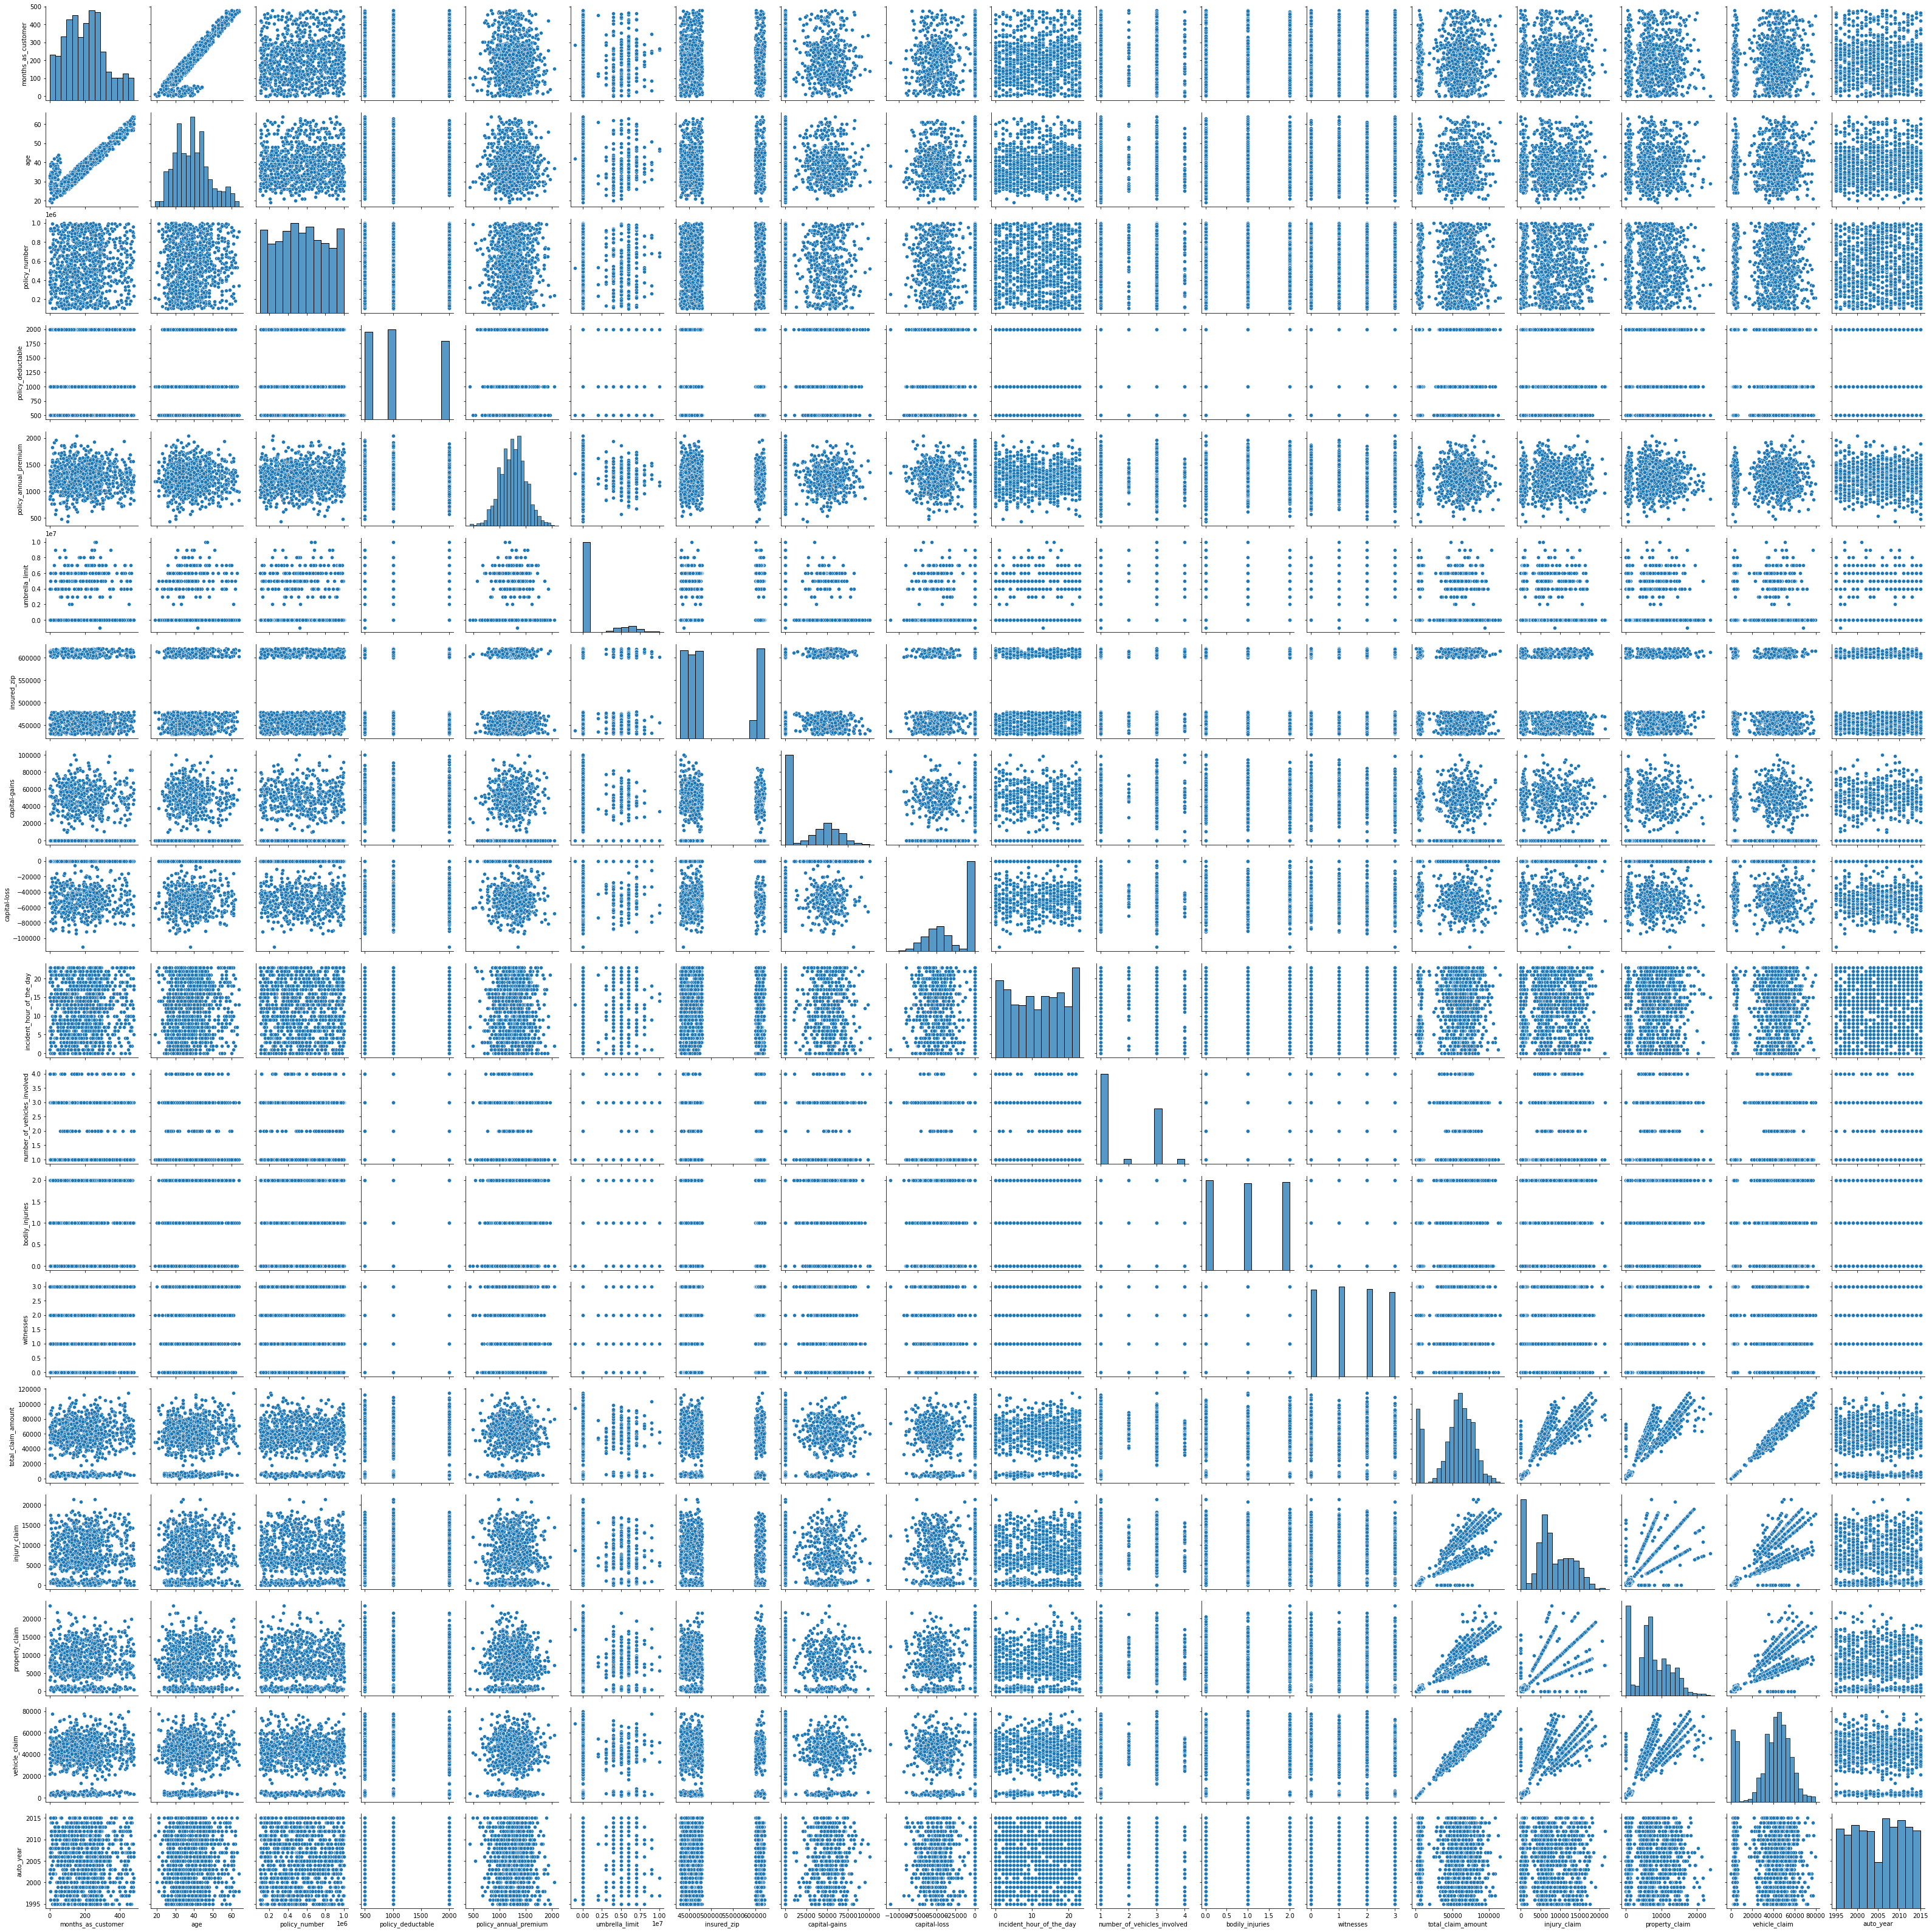

In [50]:
 # Creating a pairplot of dataset
fig=plt.figure(figsize=(20,10))
sns.pairplot(df)
plt.savefig('multi1.png')
plt.show()

## Encoding the DataFrame :-

In [51]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [52]:
for col in df.columns:
    if df[col].dtypes== 'object':
        le=LabelEncoder()
        df[col]=le.fit_transform(df[col])
df

months_as_customer  age  policy_number  policy_bind_date  policy_state  \
0                   328   48         521585               532             2   
1                   228   42         342868               821             1   
2                   134   29         687698               186             2   
3                   256   41         227811               766             0   
4                   228   44         367455               181             0   
..                  ...  ...            ...               ...           ...   
995                   3   38         941851               487             2   
996                 285   41         186934               129             0   
997                 130   34         918516               509             2   
998                 458   62         533940               573             0   
999                 456   60         556080               359             2   

     policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0             1               1000                1406.91               0   
1             1               2000                1197.22         5000000   
2             0               2000                1413.14         5000000   
3             1               2000                1415.74         6000000   
4             2               1000                1583.91         6000000   
..          ...                ...                    ...             ...   
995           2               1000                1310.80               0   
996           0               1000                1436.79               0   
997           1                500                1383.49         3000000   
998           2               2000                1356.92         5000000   
999           1               1000                 766.19               0   

     insured_zip  ...  witnesses  police_report_available  total_claim_amount  \
0         466132  ...          2                        1               71610   
1         468176  ...          0                        0                5070   
2         430632  ...          3                        0               34650   
3         608117  ...          2                        0               63400   
4         610706  ...          1                        0                6500   
..           ...  ...        ...                      ...                 ...   
995       431289  ...          1                        0               87200   
996       608177  ...          3                        0              108480   
997       442797  ...          3                        1               67500   
998       441714  ...          1                        1               46980   
999       612260  ...          3                        0                5060   

     injury_claim  property_claim  vehicle_claim  auto_make  auto_model  \
0            6510           13020          52080         10           1   
1             780             780           3510          8          12   
2            7700            3850          23100          4          30   
3            6340            6340          50720          3          34   
4            1300             650           4550          0          31   
..            ...             ...            ...        ...         ...   
995         17440            8720          61040          6           6   
996         18080           18080          72320         13          28   
997          7500            7500          52500         11          19   
998          5220            5220          36540          1           5   
999           460             920           3680          8          12   

     auto_year  fraud_reported  
0         2004               1  
1         2007               1  
2         2007               0  
3         2014               1  
4         2009               0  
..         ...             ...  
995       2006            

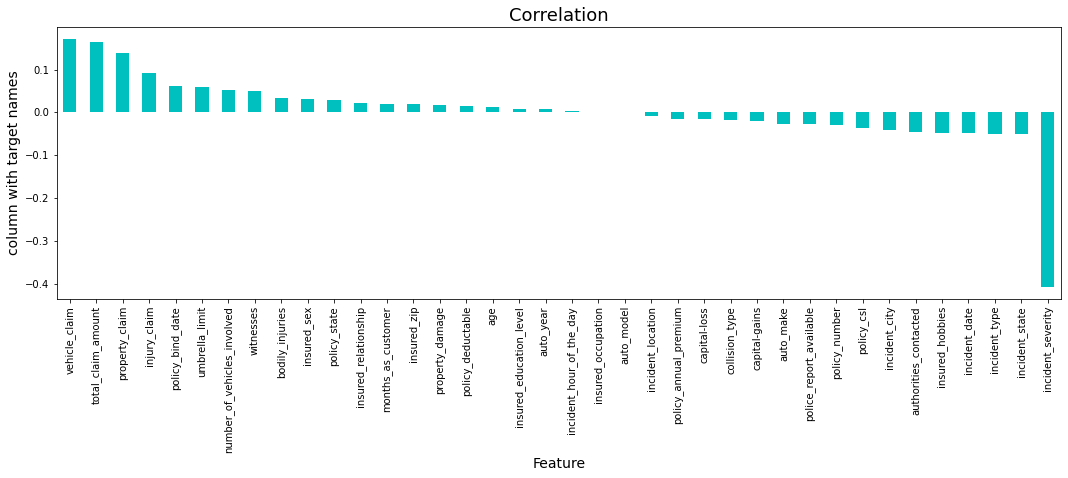

In [53]:
plt.figure(figsize=(18,5))
df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

- Variables above 0 are positvely related to the target variable and variables below 0 are negatively related to the target variable.

### Sepearating target variable : -

In [54]:
x = df.drop('fraud_reported', axis=1)
y = df['fraud_reported']

### Checking the skewness

In [55]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000


keeping +/- 0.5 as the range for skeness.

In [56]:
from sklearn.preprocessing import power_transform
df=power_transform(x)
df=pd.DataFrame(df,columns=x.columns)
df.skew()

months_as_customer            -0.135661
age                           -0.001945
policy_number                 -0.160374
policy_bind_date              -0.291937
policy_state                  -0.145377
policy_csl                    -0.100769
policy_deductable              0.023988
policy_annual_premium          0.004758
umbrella_limit                -7.865930
insured_zip                    0.000000
insured_sex                    0.148630
insured_education_level       -0.188564
insured_occupation            -0.239336
insured_hobbies               -0.247798
insured_relationship          -0.160421
capital-gains                  0.038722
capital-loss                   0.090488
incident_date                 -0.264053
incident_type                 -0.088766
collision_type                -0.129334
incident_severity             -0.079282
authorities_contacted         -0.227269
incident_state                -0.255777
incident_city                 -0.181772
incident_location             -0.288423


### Handling the outliers :-

In [57]:
from numpy import percentile

columns = df.columns
for j in columns:
    if isinstance(df[j][0], str) :
        continue
    else:
        for i in range(len(df)):
            #defining quartiles
            quartiles = percentile(df[j], [25,75])
            # calculate min/max
            lower_fence = quartiles[0] - (1.5*(quartiles[1]-quartiles[0]))
            upper_fence = quartiles[1] + (1.5*(quartiles[1]-quartiles[0]))
            if df[j][i] > upper_fence:
                df[j][i] = upper_fence
            elif df[j][i] < lower_fence:
                df[j][i] = lower_fence

In [58]:
print(df.policy_annual_premium.min())
print(df.policy_annual_premium.max())

-2.6877916028895648
2.656956412026587


## Feature selection¶


In [59]:
df=df[['policy_state', 'insured_education_level', 'insured_occupation',
    'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted']].describe()

In [61]:
df.dtypes

policy_state               float64
insured_education_level    float64
insured_occupation         float64
incident_type              float64
collision_type             float64
incident_severity          float64
authorities_contacted      float64
dtype: object

In [62]:
df.shape

(8, 7)

## Normalisation

In [63]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
x=mms.fit_transform(x)
from sklearn.metrics import f1_score
x

array([[0.68475992, 0.64444444, 0.4682467 , ..., 0.76923077, 0.02631579,
        0.45      ],
       [0.47599165, 0.51111111, 0.26936974, ..., 0.61538462, 0.31578947,
        0.6       ],
       [0.27974948, 0.22222222, 0.65309788, ..., 0.30769231, 0.78947368,
        0.6       ],
       ...,
       [0.27139875, 0.33333333, 0.90995303, ..., 0.84615385, 0.5       ,
        0.05      ],
       [0.95615866, 0.95555556, 0.48199539, ..., 0.07692308, 0.13157895,
        0.15      ],
       [0.9519833 , 0.91111111, 0.50663287, ..., 0.61538462, 0.31578947,
        0.6       ]])

## Checking & handling class-imbalance in target variable :-

In [64]:
round(y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    75.3 %
1    24.7 %
Name: fraud_reported, dtype: object

In [65]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [66]:
ros = RandomOverSampler(random_state=42)

In [67]:
ros.fit(x,y)

RandomOverSampler(random_state=42)

In [68]:
x_resampled,y_resampled=ros.fit_resample(x,y)

In [69]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression
maxAccuracy=0
maxRs=0
for i in range(100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    predrf=lr.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccuracy:
        macAccuracy=acc
        maxRS=i
print('The best accuracy is', maxAccuracy,' on Random state',maxRS)

The best accuracy is 0  on Random state 99


In [70]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=99)

In [71]:
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (1204, 38)
x_test shape: (302, 38)
y_train shape: (1204,)
y_test shape: (302,)


## Logistic Regression Model :-

In [72]:
from sklearn.linear_model import LogisticRegression
ln= LogisticRegression(random_state=99)
ln.fit(x_train,y_train)
y_pred_ln=ln.predict(x_test)

print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_ln) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_ln) * 100, 2))

Logistic Regression:
Accuracy score: 75.83
F1 score: 77.12


## Random Forest Classifier Model :-

In [73]:
from sklearn.ensemble import RandomForestClassifier
rdf= RandomForestClassifier(random_state=42)
rdf.fit(x_train,y_train)
y_pred_rdf=rdf.predict(x_test)

print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_rdf) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_rdf) * 100, 2))

Random Forest Classifier:
Accuracy score: 90.07
F1 score: 90.45


## Decision Tree Classifier model testing -



In [74]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_test,y_test)
predictiondtc=dtc.predict(x_test)
print(accuracy_score(y_test,predictiondtc))
print(confusion_matrix(y_test,predictiondtc))
print(classification_report(y_test,predictiondtc))

1.0
[[152   0]
 [  0 150]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       152
           1       1.00      1.00      1.00       150

    accuracy                           1.00       302
   macro avg       1.00      1.00      1.00       302
weighted avg       1.00      1.00      1.00       302



## Nearest Neighbors Classifier model testing -

In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predictionknn=knn.predict(x_test)
print(accuracy_score(y_test,predictionknn))
print(confusion_matrix(y_test,predictionknn))
print(classification_report(y_test,predictionknn))

0.6788079470198676
[[108  44]
 [ 53  97]]
              precision    recall  f1-score   support

           0       0.67      0.71      0.69       152
           1       0.69      0.65      0.67       150

    accuracy                           0.68       302
   macro avg       0.68      0.68      0.68       302
weighted avg       0.68      0.68      0.68       302



In [76]:
def kneighbors(k):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    knn.score(x_train,y_train)
    predictionknn=knn.predict(x_test)
    print(accuracy_score(y_test,predictionknn))
    print(confusion_matrix(y_test,predictionknn))
    print(classification_report(y_test,predictionknn))

In [77]:
kneighbors(4)

0.6788079470198676
[[108  44]
 [ 53  97]]
              precision    recall  f1-score   support

           0       0.67      0.71      0.69       152
           1       0.69      0.65      0.67       150

    accuracy                           0.68       302
   macro avg       0.68      0.68      0.68       302
weighted avg       0.68      0.68      0.68       302



In [78]:
kneighbors(5)

0.6986754966887417
[[ 95  57]
 [ 34 116]]
              precision    recall  f1-score   support

           0       0.74      0.62      0.68       152
           1       0.67      0.77      0.72       150

    accuracy                           0.70       302
   macro avg       0.70      0.70      0.70       302
weighted avg       0.70      0.70      0.70       302



In [79]:
kneighbors(3)

0.7119205298013245
[[ 97  55]
 [ 32 118]]
              precision    recall  f1-score   support

           0       0.75      0.64      0.69       152
           1       0.68      0.79      0.73       150

    accuracy                           0.71       302
   macro avg       0.72      0.71      0.71       302
weighted avg       0.72      0.71      0.71       302



In [80]:
kneighbors(6)

0.6655629139072847
[[104  48]
 [ 53  97]]
              precision    recall  f1-score   support

           0       0.66      0.68      0.67       152
           1       0.67      0.65      0.66       150

    accuracy                           0.67       302
   macro avg       0.67      0.67      0.67       302
weighted avg       0.67      0.67      0.67       302



### Support Vecotr Classifier model testing -

In [81]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predictionsvc=svc.predict(x_test)
print(accuracy_score(y_test,predictionsvc))
print(confusion_matrix(y_test,predictionsvc))
print(classification_report(y_test,predictionsvc))

0.8211920529801324
[[116  36]
 [ 18 132]]
              precision    recall  f1-score   support

           0       0.87      0.76      0.81       152
           1       0.79      0.88      0.83       150

    accuracy                           0.82       302
   macro avg       0.83      0.82      0.82       302
weighted avg       0.83      0.82      0.82       302



In [82]:
from sklearn.svm import SVC
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predictionsvc=svc.predict(x_test)
print(accuracy_score(y_test,predictionsvc))
print(confusion_matrix(y_test,predictionsvc))
print(classification_report(y_test,predictionsvc))

0.8344370860927153
[[116  36]
 [ 14 136]]
              precision    recall  f1-score   support

           0       0.89      0.76      0.82       152
           1       0.79      0.91      0.84       150

    accuracy                           0.83       302
   macro avg       0.84      0.83      0.83       302
weighted avg       0.84      0.83      0.83       302



In [83]:
def svckernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    predictionsvc=svc.predict(x_test)
    print(accuracy_score(y_test,predictionsvc))
    print(confusion_matrix(y_test,predictionsvc))
    print(classification_report(y_test,predictionsvc))

In [84]:
svckernel('poly')

0.8344370860927153
[[116  36]
 [ 14 136]]
              precision    recall  f1-score   support

           0       0.89      0.76      0.82       152
           1       0.79      0.91      0.84       150

    accuracy                           0.83       302
   macro avg       0.84      0.83      0.83       302
weighted avg       0.84      0.83      0.83       302



In [85]:
svckernel('rbf')

0.8211920529801324
[[116  36]
 [ 18 132]]
              precision    recall  f1-score   support

           0       0.87      0.76      0.81       152
           1       0.79      0.88      0.83       150

    accuracy                           0.82       302
   macro avg       0.83      0.82      0.82       302
weighted avg       0.83      0.82      0.82       302



## Cross-Validation score for each model :-

In [92]:
from sklearn.model_selection import cross_val_score

## Logistic Regression Model :-

In [94]:
cvs=cross_val_score(dtc,x,y,cv=5)
print('The cross validation score for LinearRegression model is :',cvs.mean())
print('The difference between accuracy and crossvalidation score is :75.05.')

The cross validation score for LinearRegression model is : 0.783
The difference between accuracy and crossvalidation score is :75.05.


## Support Vector Classifier  Model:-

In [96]:
cvs=cross_val_score(svc,x,y,cv=5)
print('The cross validation score for SupportVectorClassification model is :',cvs.mean())
print('The difference between accuracy and crossvalidation score is :0.10119205298013245.')

The cross validation score for SupportVectorClassification model is : 0.72
The difference between accuracy and crossvalidation score is :0.10119205298013245.


## Decision Tree Classifier model¶



In [98]:
cvs=cross_val_score(dtc,x,y,cv=5)
print('The cross validation score for DecisionTreeClassifier model is :',cvs.mean())
print('The difference between accuracy and crossvalidation score is :0.21599999999999997.')

The cross validation score for DecisionTreeClassifier model is : 0.7809999999999999
The difference between accuracy and crossvalidation score is :0.21599999999999997.


## Random Forest Classifier Model :-

In [101]:
cvs=cross_val_score(dtc,x,y,cv=5)
print('The cross validation score for DecisionTreeClassifier model is :',cvs.mean())
print('The difference between accuracy and crossvalidation score is :89.30199999999999.')

The cross validation score for DecisionTreeClassifier model is : 0.782
The difference between accuracy and crossvalidation score is :89.30199999999999.


## Nearest Neighbors Classifier model : -

In [104]:
cvs=cross_val_score(dtc,x,y,cv=5)
print('The cross validation score for Nearest Neighbors Classifier model is :',cvs.mean())
print('The difference between accuracy and crossvalidation score is :0.09619205298013245.')

The cross validation score for Nearest Neighbors Classifier model is : 0.778
The difference between accuracy and crossvalidation score is :0.09619205298013245.


In [105]:
import pickle

filename='pickledtcfile.pkl'
pickle.dump(svc,open('pickledtcfile','wb'))

In [106]:
saved_model=pickle.load(open('pickledtcfile','rb'))
saved_model.predict(x_test)

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,